## Data

In [25]:
from datasets import load_dataset, Dataset
bs27 = load_dataset("bespokelabs/Bespoke-Stratos-17k", split="train")

In [27]:
for i, example in enumerate(bs27):
    assert len(example["conversations"]) == 2

In [42]:
import re
def extract_tag_content(text, begin="BEGIN", end="END"):
    pattern = f"{re.escape(begin)}(.*?){re.escape(end)}"
    matches = re.findall(pattern, text, re.DOTALL)
    return matches

def restructure(example):
    user, assistant = example.get("conversations")
    prompt, response = user["value"], assistant["value"]
    thought = extract_tag_content(response, begin="<|begin_of_thought|>", end="<|end_of_thought|>")
    solution = extract_tag_content(response, begin="<|begin_of_solution|>", end="<|end_of_solution|>")
    return dict(
        thought=thought[0].strip(),
        solution=solution[0].strip()
    )

role_mapping = {
    "human": "user",
    "user": "user", 
    "gpt": "assistant",
    "assistant": "assistant",
    "system": "system"
}

def convert_example(example):
    messages = []
    for conv in example["conversations"]:
        messages.append({
            "role": role_mapping.get(conv["from"], conv["from"]),
            "content": conv["value"]
        })
    return {"messages": messages}

In [43]:
data = bs27.map(restructure).filter(lambda x: len(x["thought"].split()) < 3000)

In [44]:
data = data.map(convert_example, remove_columns=["conversations"])

In [45]:
print(data.shuffle()[0]["thought"])

Okay, let's try to figure out this problem step by step. So, Marika's 8th birthday was in 2004. That means she was born in 2004 minus 8 years, which is 1996. Wait, no, actually, if her 8th birthday is in 2004, she was born in 1996 because 2004 minus 8 equals 1996. Yeah, that makes sense. So Marika was born in 1996.

Now, in 2004, her father said, "My age is now four times your age." So at that time, Marika is 8, so her father is 4 times 8, which is 32 years old. Wait, hold on. If the father is 32 years old in 2004, then he was born in 2004 minus 32, which is 1972. So the father's birth year is 1972. Let me check that again. If in 2004 the father is 32, then yes, 2004 - 32 = 1972. So father is born in 1972, Marika in 1996. So the age difference between them is 32 - 8 = 24 years. Wait, no, actually, the age difference is always constant. So if the father is 32 when Marika is 8, then the difference is 32 - 8 = 24 years. So the father is 24 years older than Marika. That makes sense.

So th

In [46]:
data[32]['solution']

'To determine the time 2011 minutes after midnight on January 1, 2011, we first convert minutes into hours and days:\n\n1. **Convert 2011 minutes to hours**:  \n   \\[\n   2011 \\div 60 = 33 \\text{ hours and } 31 \\text{ minutes.}\n   \\]  \n   This means 2011 minutes is equivalent to 33 hours and 31 minutes.\n\n2. **Break down 33 hours into days and hours**:  \n   \\[\n   33 \\text{ hours} = 24 \\text{ hours (1 day)} + 9 \\text{ hours.}\n   \\]  \n   Adding 24 hours to midnight brings us to midnight on January 2. The remaining 9 hours and 31 minutes are then added to this time.\n\n3. **Calculate the final time**:  \n   Starting from midnight on January 2, adding 9 hours gives 9:00 AM. Adding the remaining 31 minutes results in **9:31 AM**.\n\nThus, 2011 minutes after midnight on January 1, 2011, is **January 2 at 9:31 AM**.\n\n\\[\n\\boxed{D}\n\\]'

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import seaborn as sns
from scipy import stats

def analyze_string_lengths(string_list):
    """
    Calculate statistics about the lengths of strings in a list and plot distributions.
    
    Args:
        string_list (list): A list of strings to analyze
    """
    # Calculate lengths of each string
    lengths = [len(s.split()) for s in string_list]
    
    # Basic statistics
    stats_summary = {
        "Count": len(lengths),
        "Min Length": min(lengths),
        "Max Length": max(lengths),
        "Average Length": np.mean(lengths),
        "Median Length": np.median(lengths),
        "Std Dev": np.std(lengths),
        "25th Percentile": np.percentile(lengths, 25),
        "75th Percentile": np.percentile(lengths, 75)
    }
    
    # Print statistics summary
    print("String Length Statistics:")
    for stat, value in stats_summary.items():
        if isinstance(value, float):
            print(f"{stat}: {value:.2f}")
        else:
            print(f"{stat}: {value}")
    
    # Create a figure with multiple plots
    plt.figure(figsize=(15, 10))
    
    # 1. Histogram of string lengths
    plt.subplot(2, 2, 1)
    plt.hist(lengths, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of String Lengths')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Return the statistics dict in case it's needed
    return stats_summary

String Length Statistics:
Count: 11895
Min Length: 141
Max Length: 2999
Average Length: 1258.47
Median Length: 1058.00
Std Dev: 679.60
25th Percentile: 714.00
75th Percentile: 1690.50


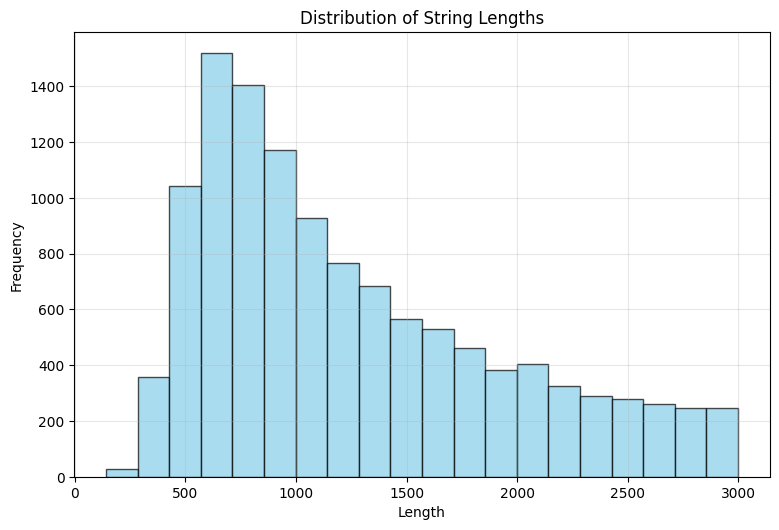

{'Count': 11895,
 'Min Length': 141,
 'Max Length': 2999,
 'Average Length': 1258.4741488020177,
 'Median Length': 1058.0,
 'Std Dev': 679.5954320206005,
 '25th Percentile': 714.0,
 '75th Percentile': 1690.5}

In [48]:
analyze_string_lengths(
    data["thought"]
)

In [50]:
data[0]["messages"]

[{'content': 'Return your final response within \\boxed{}. The operation $\\otimes$ is defined for all nonzero numbers by $a\\otimes b =\\frac{a^{2}}{b}$. Determine $[(1\\otimes 2)\\otimes 3]-[1\\otimes (2\\otimes 3)]$.\n$\\text{(A)}\\ -\\frac{2}{3}\\qquad\\text{(B)}\\ -\\frac{1}{4}\\qquad\\text{(C)}\\ 0\\qquad\\text{(D)}\\ \\frac{1}{4}\\qquad\\text{(E)}\\ \\frac{2}{3}$',
  'role': 'user'},
 {'content': "<|begin_of_thought|>\n\nOkay, let me try to figure out this problem. So, we have this operation defined as a⊗b = a²/b. And we need to compute [(1⊗2)⊗3] - [1⊗(2⊗3)]. Then choose the correct answer from the options given. Alright, let's break it down step by step.\n\nFirst, I need to remember that the operation ⊗ is not associative, right? Because the problem is asking for the difference between two different groupings: (1⊗2)⊗3 and 1⊗(2⊗3). So, the order in which we perform the operations matters here. That's probably why there's a subtraction between them.\n\nLet me start by computing e

In [58]:
data.to_json("../data/reasoning/mini-stratos-11k/train.jsonl")

Creating json from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

221266308

In [60]:
data = load_dataset("../data/reasoning/mini-stratos-11k", split="train")

Generating train split: 0 examples [00:00, ? examples/s]

In [61]:
data

Dataset({
    features: ['system', 'thought', 'solution', 'messages'],
    num_rows: 11895
})

## Train

In [1]:
from transformers import AutoTokenizer
from models.llama import LlamaForCausalLM

[2025-05-24 11:25:59,310] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/opt/conda/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/opt/conda/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


In [2]:
model_name = "model_hub/Llama-3.2-1B-Instruct/"

In [3]:
tokenizer = AutoTokenizer.from_pretrained(
    model_name
)
if not tokenizer.pad_token:
    tokenizer.pad_token = tokenizer.eos_token

In [4]:
from transformers import AddedToken
latent_tokens = [
    AddedToken(f"<|latent_{i:03}|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True)
    for i in range(256)
]

markers = ["<|begin_of_thought|>", "<|end_of_thought|>", "<|begin_of_solution|>", "<|end_of_solution|>"]
marker_tokens = [
    AddedToken(marker, rstrip=False, lstrip=False, single_word=False, normalized=False, special=True)
    for marker in markers
]

new_tokens = latent_tokens + marker_tokens
tokenizer.add_tokens(new_tokens)

260

In [5]:
tokenizer.encode("<|begin_of_thought|>", add_special_tokens=False)

[128512]

In [6]:
from dataclasses import dataclass
from typing import (
    Any, Callable, Dict, 
    List, NewType, Optional, 
    Tuple, Union, Mapping
)
from abc import ABC, abstractmethod
from datasets import load_dataset, concatenate_datasets
from accelerate.logging import get_logger
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

import torch
import safetensors
import math
import yaml
import logging
import copy
import gc
import os
import argparse
import sys
import shutil

from tqdm import tqdm
from transformers import (
    PreTrainedTokenizerBase,
    PreTrainedModel,
    PretrainedConfig,
    AutoConfig,
    AutoModelForCausalLM,
    AutoTokenizer,
    LlamaForCausalLM,
    LlamaConfig,
    Trainer,
    TrainingArguments,
    HfArgumentParser,
    default_data_collator,
    is_torch_xla_available,
    set_seed,
)

class DataProcessor:
    def __init__(
        self, tokenizer: PreTrainedTokenizerBase, 
        dataset_configs: Dict[str, int], 
        split: str, max_length: int, 
        train_on_inputs: bool = False
    ):  # Add this parameter
        
        self.tokenizer = tokenizer
        self.dataset_configs = dataset_configs
        self.split = split
        self.max_length = max_length
        self.train_on_inputs = train_on_inputs  # Store the flag

    def load_dataset(self):
        """Load and prepare the training dataset."""
        datasets_list = []
        
        for data_config, num_samples in self.dataset_configs.items():
            print(f"Loading {num_samples} samples from {data_config}")
            new_dataset = load_dataset(data_config, split=self.split)
            
            # Randomly sample the specified number of examples
            if num_samples and num_samples < len(new_dataset):
                new_dataset = new_dataset.shuffle(seed=42).select(range(num_samples))

            datasets_list.append(new_dataset)
            
        train_dataset = concatenate_datasets(datasets_list)
        print(f"Training on {len(train_dataset)} samples total.")
        return train_dataset.shuffle(seed=101)

    def tokenize(self, element):
        """Tokenize a single element and mark tokens for loss computation based on train_on_inputs."""
        effective_spans = []
        current_position = 0
        
        # Track positions of assistant messages
        for message in element["messages"]:
            message_tokens = self.tokenizer.apply_chat_template(
                [message],
                tokenize=True,
                add_generation_prompt=False
            )
            
            if message["role"] == "assistant" or (self.train_on_inputs and message["role"] == "user"):
                effective_spans.append((
                    current_position,
                    current_position + len(message_tokens)
                ))
            current_position += len(message_tokens)

        # Tokenize full conversation
        tokenized = self.tokenizer(
            self.tokenizer.apply_chat_template(
                element["messages"],
                tokenize=False,
                add_generation_prompt=False
            ),
            truncation=True,
            max_length=self.max_length,
            add_special_tokens=False
        )

        # Create labels with -100 for tokens we don't want to compute loss on
        labels = [-100] * len(tokenized["input_ids"])
        for start, end in effective_spans:
            for i in range(start, min(end, len(labels))):
                labels[i] = tokenized["input_ids"][i]
                
        tokenized["labels"] = labels
        return tokenized

In [7]:
from transformers import DataCollatorForLanguageModeling, torch_default_data_collator

ImportError: cannot import name 'torch_default_data_collator' from 'transformers' (/opt/conda/lib/python3.11/site-packages/transformers/__init__.py)

In [8]:
default_data_collator??

Signature:
default_data_collator(
    features: List[transformers.data.data_collator.InputDataClass],
    return_tensors='pt',
) -> Dict[str, Any]
Source:   
def default_data_collator(features: List[InputDataClass], return_tensors="pt") -> Dict[str, Any]:
    """
    Very simple data collator that simply collates batches of dict-like objects and performs special handling for
    potential keys named:

        - `label`: handles a single value (int or float) per object
        - `label_ids`: handles a list of values per object

    Does not do any additional preprocessing: property names of the input object will be used as corresponding inputs
    to the model. See glue and ner for example of how it's useful.
    """

    # In this function we'll make the assumption that all `features` in the batch
    # have the same attributes.
    # So we will look at the first element as a proxy for what attributes exist
    # on the whole batch.

    if return_tensors == "pt":
        return torch_

In [9]:
@dataclass 
class SFTDataCollator:
    tokenizer: PreTrainedTokenizerBase
    pad_to_multiple_of: Optional[int] = 4
    return_tensors: str = "pt"
    
    def _format_batch_log(self, batch):
        """Format the batch sample log showing colored text chunks."""
        input_ids = batch["input_ids"][0].tolist()  
        labels = batch["labels"][0].tolist()
        
        # Build chunks of tokens with same label type (-100 or non -100)
        chunks = []
        current_chunk = {"tokens": [], "is_ignored": labels[0] == -100}
        
        for token_id, label in zip(input_ids, labels):
            is_ignored = label == -100
            # If label type changes, start new chunk
            if is_ignored != current_chunk["is_ignored"]:
                chunks.append(current_chunk)
                current_chunk = {"tokens": [], "is_ignored": is_ignored}
            current_chunk["tokens"].append(token_id)
        
        # Add final chunk
        chunks.append(current_chunk)
        
        # Format output
        log_messages = []
        log_messages.append("=== Sample text chunks ===")
        # Decode and display each chunk with appropriate color
        for i, chunk in enumerate(chunks):
            text = self.tokenizer.decode(chunk["tokens"])
            color = ("\033[90m" if (i == len(chunks) - 1) and chunk["is_ignored"] # Gray for padded.
                     else "\033[91m" if chunk["is_ignored"] # Red for ignored.
                     else "\033[92m") # Green for trained.
            log_messages.append(f"{color}{text}\033[0m")
            
        
        log_messages.append("==========================")
        return "\n".join(log_messages)

    def __post_init__(self):
        self.first_batch = True

    def __call__(self, examples: List[Dict[str, Any]]) -> Dict[str, Any]:
        """Process a batch with proper padding."""
        if not isinstance(examples[0], Mapping):
            raise ValueError("Data collator only processes list of dictionaries.")
        
        # Extract input_ids and labels
        input_ids_list = []
        labels_list = []
        other_features = {}
        
        for example in examples:
            # Pop attention_mask if present (not needed for padding)
            example.pop("attention_mask", None)
            
            # Extract input_ids and labels
            input_ids_list.append({"input_ids": example.pop("input_ids")})
            labels_list.append({"input_ids": example.pop("labels")})
            
            # Collect other features
            for key, value in example.items():
                if key not in other_features:
                    other_features[key] = []
                other_features[key].append(value)
        
        # Pad input_ids
        batch = self.tokenizer.pad(
            input_ids_list,
            return_tensors=self.return_tensors,
            pad_to_multiple_of=self.pad_to_multiple_of,
            padding_side="right",
        )
        
        # Pad labels
        labels_batch = self.tokenizer.pad(
            labels_list,
            return_tensors=self.return_tensors,
            pad_to_multiple_of=self.pad_to_multiple_of,
            padding_side="right",
        )
        
        # Set padded positions in labels to -100 (ignore in loss)
        labels = labels_batch["input_ids"]
        if self.tokenizer.pad_token_id is not None:
            labels[labels == self.tokenizer.pad_token_id] = -100
        batch["labels"] = labels
        
        # Add other features to batch
        for key, values in other_features.items():
            if key in batch:
                raise ValueError(
                    f"`{key}` feature is already collated. "
                    "Overriding it with initial values is prohibited."
                )
            
            # Convert to tensor if all values are numeric
            if all(isinstance(v, (int, float)) for v in values):
                batch[key] = torch.tensor(values, dtype=torch.long)
            else:
                batch[key] = values
        
        return batch

In [10]:
# Setup tokenizer and data processing

dataset_configs = {
    "/workspace/data/reasoning/mini-stratos-11k": None
}
    
data_processor = DataProcessor(
    tokenizer, 
    dataset_configs, 
    split="train", 
    max_length=4096, 
    train_on_inputs=True
)
train_dataset = data_processor.load_dataset()
tokenized_dataset = train_dataset.map(
    data_processor.tokenize,
    # remove_columns=["messages"],
    num_proc=32
).select_columns(["input_ids", "attention_mask", "labels"])

Loading None samples from /workspace/data/reasoning/mini-stratos-11k
Training on 11895 samples total.


Map (num_proc=32):   0%|          | 0/11895 [00:00<?, ? examples/s]

In [11]:
data_collator = SFTDataCollator(tokenizer=tokenizer)

In [12]:
tokenized_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 11895
})

In [13]:
model = LlamaForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
)
model.resize_token_embeddings(len(tokenizer))

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(128516, 2048, padding_idx=128004)

In [17]:
model.loss_function

<function transformers.loss.loss_utils.ForCausalLMLoss(logits, labels, vocab_size: int, num_items_in_batch: Optional[int] = None, ignore_index: int = -100, shift_labels: Optional[torch.Tensor] = None, **kwargs) -> torch.Tensor>

In [18]:
from transformers.loss.loss_utils import ForCausalLMLoss

In [20]:
ForCausalLMLoss??

Signature:
ForCausalLMLoss(
    logits,
    labels,
    vocab_size: int,
    num_items_in_batch: Optional[int] = None,
    ignore_index: int = -100,
    shift_labels: Optional[torch.Tensor] = None,
    **kwargs,
) -> torch.Tensor
Docstring: <no docstring>
Source:   
def ForCausalLMLoss(
    logits,
    labels,
    vocab_size: int,
    num_items_in_batch: Optional[int] = None,
    ignore_index: int = -100,
    shift_labels: Optional[torch.Tensor] = None,
    **kwargs,
) -> torch.Tensor:
    # Upcast to float if we need to compute the loss to avoid potential precision issues
    logits = logits.float()

    if shift_labels is None:
        # Shift so that tokens < n predict n
        labels = nn.functional.pad(labels, (0, 1), value=ignore_index)
        shift_labels = labels[..., 1:].contiguous()

    # Flatten the tokens
    logits = logits.view(-1, vocab_size)
    shift_labels = shift_labels.view(-1)
    # Enable model parallelism
    shift_labels = shift_labels.to(logits.device)
    l

In [85]:
tokenized_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 11895
})

In [23]:
Trainer.compute_loss??

Signature:
Trainer.compute_loss(
    self,
    model,
    inputs,
    return_outputs=False,
    num_items_in_batch=None,
)
Source:   
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        """
        How the loss is computed by Trainer. By default, all models return the loss in the first element.

        Subclass and override for custom behavior.
        """
        if (self.label_smoother is not None or self.compute_loss_func is not None) and "labels" in inputs:
            labels = inputs.pop("labels")
        else:
            labels = None
        if self.model_accepts_loss_kwargs:
            loss_kwargs = {}
            if num_items_in_batch is not None:
                loss_kwargs["num_items_in_batch"] = num_items_in_batch
            inputs = {**inputs, **loss_kwargs}
        outputs = model(**inputs)
        # Save past state if it exists
        # TODO: this needs to be fixed and made cleaner later.
        if self.args.past_index 

In [107]:
collated = data_collator([tokenized_dataset[0]]).to(model.device)

In [108]:
collated

{'input_ids': tensor([[128000, 128006,   9125,  ...,   2595, 128515, 128009]],
       device='cuda:1'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:1'), 'labels': tensor([[128000, 128006,   9125,  ...,   2595, 128515, 128009]],
       device='cuda:1')}

In [105]:
model = model.to("cuda:1")

In [109]:
logits = model(**collated).logits

In [110]:
logits

tensor([[[ 2.8281,  3.5625,  7.0000,  ...,  0.1494,  0.1504,  0.1504],
         [-3.1406, -2.1250, -1.1562,  ...,  0.1533,  0.1533,  0.1533],
         [ 3.4062,  6.0000,  4.1562,  ..., -1.3672, -1.3672, -1.3672],
         ...,
         [ 3.5781,  8.1250,  9.5625,  ...,  0.4902,  0.4902,  0.4902],
         [ 1.2734,  7.6875,  7.2500,  ..., -1.9766, -1.9766, -1.9766],
         [-4.9375, -0.3535, -0.1797,  ..., -1.4688, -1.4688, -1.4688]]],
       device='cuda:1', dtype=torch.bfloat16, grad_fn=<UnsafeViewBackward0>)

In [111]:
from dataclasses import dataclass
from typing import Dict, List, Optional
import torch.nn as nn
import torch.nn.functional as F
import torch
import yaml
import logging

from transformers import Trainer

class SFTTrainer(Trainer):
    """
    Hello it's Nguyen Thanh Do.
    """ 
    def log(self, logs: Dict[str, float], start_time: Optional[float] = None) -> None:
        output = {**logs, **{"step": self.state.global_step}}
        self.state.log_history.append(output)
        self.control = self.callback_handler.on_log(self.args, self.state, self.control, logs)

    def compute_entropy_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        # Get inputs
        input_ids = inputs["input_ids"]
        labels = inputs["labels"]
        
        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=inputs.get("attention_mask"))
        logits = outputs.logits
        
        # Shift logits and labels for causal LM
        # logits: [batch_size, seq_len, vocab_size]
        # We predict token i+1 from tokens 0:i
        shift_logits = logits[..., :-1, :].contiguous()  # Remove last token
        shift_labels = labels[..., 1:].contiguous()      # Remove first token
        
        # Flatten for cross entropy computation
        shift_logits = shift_logits.view(-1, shift_logits.size(-1))  # [batch_size * (seq_len-1), vocab_size]
        shift_labels = shift_labels.view(-1)                         # [batch_size * (seq_len-1)]
        
        # Compute cross entropy loss (ignore_index=-100 by default)
        loss = F.cross_entropy(shift_logits, shift_labels, ignore_index=-100)
        return (loss, outputs) if return_outputs else loss

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        ## Debug: Before computing loss.
        # ------------------------------------------------------
        for name, param in model.named_parameters():
            if param.requires_grad and torch.isnan(param).any():
                logger.info(f"NaN detected in parameter {name}")
                import pdb; pdb.set_trace()
        # ------------------------------------------------------
        
        loss_func = self.compute_entropy_loss
        loss = loss_func(model, inputs, return_outputs, num_items_in_batch)
            
        ## Debug: After computing loss.
        # ------------------------------------------------------
        if torch.isnan(loss):
            logger.info(f"Loss became NaN")
            import pdb; pdb.set_trace()
        # ------------------------------------------------------

        return (loss, outputs) if return_outputs else loss

In [112]:
torch.float16

torch.float16